In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def reader(n):
    df = pd.read_csv("expenses.csv")

    try:
        refill_index = df[df["Date"] == "Refill" ].index[-n]
        df = df.loc[refill_index + 1 :]
    except:
        pass
    df["Amount"] = df["Amount"].astype(int)
    df["Split"] = df["Split"].astype(int)
    df["Not Me"] = df["Not Me"].astype(int)
    return df

df = reader(1)
df

,Date,Amount,Item,Category,Split,Not Me
297,2024-08-10,746,behtar,utility,1,0
298,2024-08-11,200,petrol,travel,2,0
299,2024-08-11,100,milk,utility,1,0
300,2024-08-12,20,chocolate,food,1,1
301,2024-08-12,69,milk,utility,1,0
302,2024-08-12,35,vegetable,utility,1,0
303,2024-08-13,50,food,food,2,0
304,2024-08-13,50,brownie,food,2,0
305,2024-08-13,108,milk,utility,1,0
306,2024-08-14,25,maggie,food,2,0


## total spend

In [2]:
def total_spent(df):
    d = df.drop(df[df["Not Me"] == 1].index)
    d["Amount"] = d["Amount"] / d["Split"]
    return d["Amount"].sum()

a = total_spent(df)
a

np.float64(4932.166666666667)

# top spends

In [3]:
df[["Date", "Amount", "Item", "Category"]].sort_values(by="Amount", ascending=False)

,Date,Amount,Item,Category
297,2024-08-10,746,behtar,utility
318,2024-08-18,480,rakshabandhan-chocolate,utility
310,2024-08-15,402,behtar,utility
323,2024-08-22,390,oil,utility
331,2024-08-24,300,tallentex,utility
320,2024-08-20,260,sabudana,utility
316,2024-08-17,240,breakfast,utility
333,2024-08-25,200,pasta,food
328,2024-08-24,200,petrol,travel
338,2024-08-22,200,petrol,travel


## categorical

In [4]:
def categorical(df):
    d = df[["Category", "Amount", "Split", "Not Me"]]
    d = d.drop(d[d["Not Me"] == 1].index)
    d["Amount"] = d["Amount"] / d["Split"]
    d.drop(["Split", "Not Me"], axis=1, inplace=True)
    d = d.groupby("Category").sum()
    return d

d = categorical(df)
d

,Amount
Category,
food,734.166667
travel,500.000000
utility,3698.000000


## plot

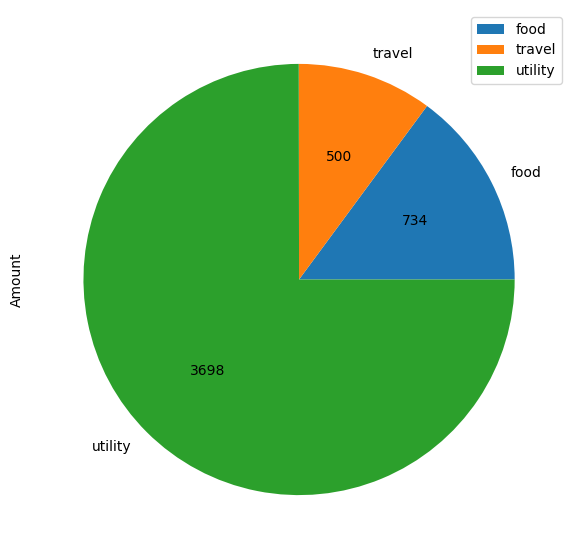

In [5]:
def absolute_value(val):
    return int(round(val / 100.0 * d["Amount"].sum()))

plt.figure(figsize=(7, 7))
d["Amount"].plot(kind="pie", autopct=absolute_value, legend=True)
plt.show()

## date wise

In [6]:
d = df[["Date", "Amount"]].groupby("Date").sum()
d

,Amount
Date,
2022-08-17,81
2024-08-10,746
2024-08-11,300
2024-08-12,124
2024-08-13,208
2024-08-14,115
2024-08-15,452
2024-08-16,431
2024-08-17,240


## plot


<Axes: xlabel='Date'>

<Figure size 900x900 with 0 Axes>

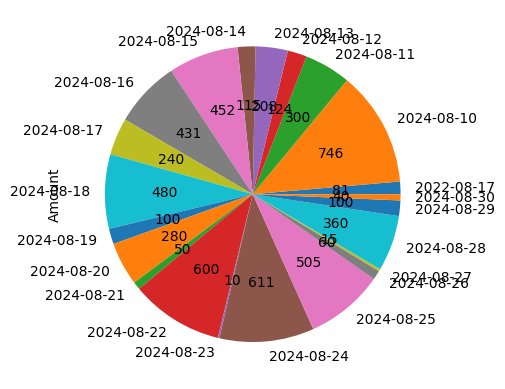

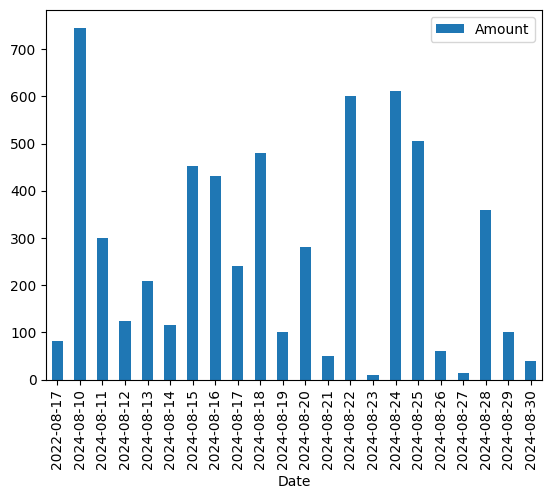

In [7]:
plt.figure(figsize=(9, 9))
d.plot(kind="pie", y="Amount", autopct=absolute_value, legend=False)
d.plot(kind="bar")


## owed

In [8]:
d = df[["Amount", "Split", "Not Me"]]
s = d[d["Not Me"] == 1]
d = d.drop(s.index)
sum1 = s["Amount"].sum()
sum2 = (d["Amount"] - (d["Amount"] / d["Split"])).sum()
print(sum1 + sum2)

975.8333333333333


## No of refills ago

In [9]:
def no_of_refills_ago(n):
    df = pd.read_csv("expenses.csv")
    refill_index = df[df["Date"] == "Refill"].index[-(n)]
    try:
        refill_index2 = df[df["Date"] == "Refill"].index[-(n + 1)]
    except:
        refill_index2 = 0
    df = df.loc[refill_index2 + 1: refill_index - 1]
    df["Amount"] = df["Amount"].astype(int)
    df["Split"] = df["Split"].astype(float)
    df["Not Me"] = df["Not Me"].astype(int)
    return categorical(df)

e = no_of_refills_ago(1)
e

,Amount
Category,
food,514.0
me,300.0
travel,315.0
utility,4551.0


## common items

In [10]:
import pandas as pd
def most_common_item():
    df = pd.read_csv("expenses.csv")
    a = df["Item"].value_counts()
    print(a)
most_common_item()

Item
vegetables      27
milk            27
petrol          26
chocolate       22
honey-chilli    10
                ..
ors              1
tallentex        1
kavali           1
burrito          1
momos            1
Name: count, Length: 128, dtype: int64


# All time - starting sep 2022

In [11]:
import pandas as pd

df = pd.read_csv("expenses.csv")
df = df.drop(df[df["Date"] == "Refill"].index)
df["Amount"] = df["Amount"].astype(int)
df["Split"] = df["Split"].astype(float)
df["Not Me"] = df["Not Me"].astype(int)
y = df[df["Not Me"] == 0]
x = y["Amount"] / y["Split"]
86000 + x.sum()


np.float64(125531.16666666667)

# Month Wise

In [12]:
import pandas as pd

df = pd.read_csv("expenses.csv")
df = df.drop(df[df["Date"] == "Refill"].index)
df["Amount"] = df["Amount"].astype(int)
df["Split"] = df["Split"].astype(float)
df["Not Me"] = df["Not Me"].astype(int)
df = df.drop(df[df["Not Me"] == 1].index)
df["Amount"] = df["Amount"] / df["Split"]
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")
s = df.groupby(df["Date"].dt.month)
s = s["Amount"].sum()
s

Date
4    6557.500000
5    9096.000000
6    6799.500000
7    7773.000000
8    9305.166667
Name: Amount, dtype: float64